In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [4]:
site = "H"

In [3]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159510 entries, 0 to 1159509
Data columns (total 26 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ts                             1159510 non-null  object 
 1   instanceID                     1159510 non-null  object 
 2   AoARel                         0 non-null        float64
 3   bladePitch                     0 non-null        float64
 4   bladePitchMax                  0 non-null        float64
 5   bladePitchMin                  0 non-null        float64
 6   bladePitchSetPoint             0 non-null        float64
 7   bladePitchStd                  0 non-null        float64
 8   cP                             1132646 non-null  float64
 9   generatorTorque                994737 non-null   float64
 10  rotorTorque                    986041 non-null   float64
 11  TI                             0 non-null        float64
 12  TSR           

In [6]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159510 entries, 0 to 1159509
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ts          1159510 non-null  object
 1   instanceID  1159510 non-null  object
 2   value       1159510 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.5+ MB


In [8]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

22
['H_WTG01' 'H_WTG02' 'H_WTG03' 'H_WTG04' 'H_WTG05' 'H_WTG06' 'H_WTG07'
 'H_WTG08' 'H_WTG09' 'H_WTG10' 'H_WTG11' 'H_WTG12' 'H_WTG13' 'H_WTG14'
 'H_WTG15' 'H_WTG16' 'H_WTG17' 'H_WTG18' 'H_WTG19' 'H_WTG20' 'H_WTG21'
 'H_WTG22']


**Comment:** data size: 1159510 x 26; flag size: 1159510 x 3. There are 22 turbines. 366 x 22 x 24 x 6 + 22 = 1159510. No missing rows.

In [9]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [10]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [11]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [12]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

### Calculate TI

In [13]:
data['TI'] = (data['Wind_speed_sd']/data['Wind_speed'])*100

In [14]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
271931,2020-03-26 20:00:00,3,26,20,H_WTG12,6.1,0.95,15.573771,13.0,65.000000,1
746516,2020-08-23 15:20:00,8,23,15,H_WTG13,9.9,1.30,13.131313,20.0,319.600006,1
567258,2020-06-28 01:20:00,6,28,1,H_WTG11,12.2,1.82,14.918033,18.0,456.299988,1
158565,2020-02-20 01:10:00,2,20,1,H_WTG12,15.0,2.30,15.333333,15.0,473.000000,1
340625,2020-04-17 12:20:00,4,17,12,H_WTG22,8.7,1.95,22.413794,22.0,271.799988,1


### Plot time series

In [15]:
data_01 = data[data['instanceID'] == site + '_WTG01']

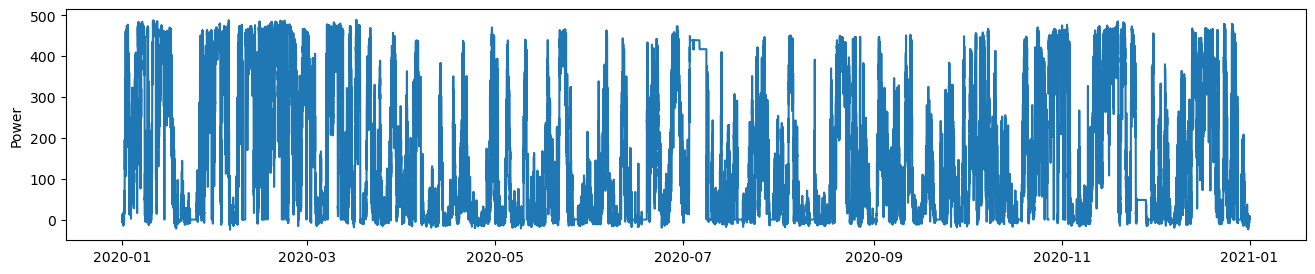

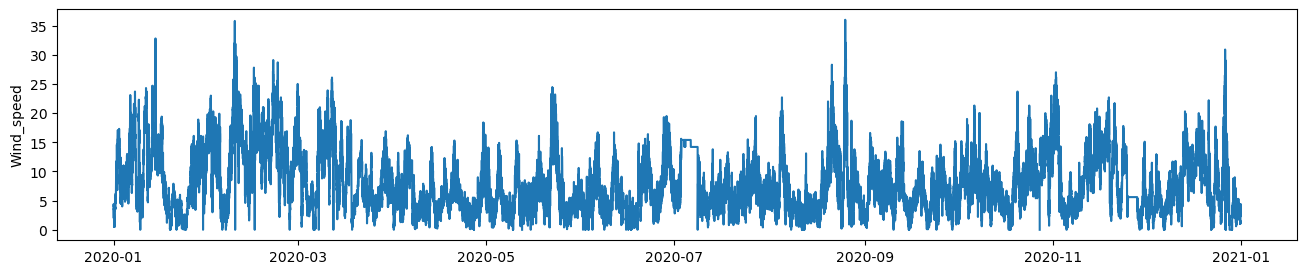

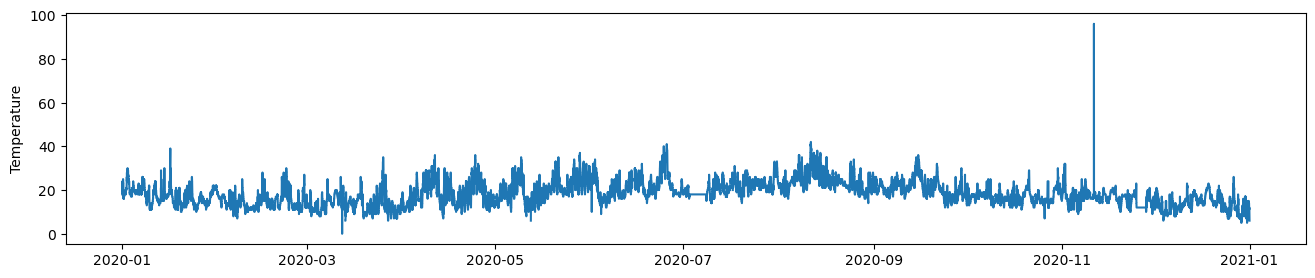

In [16]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Temperature')
plt.show()

### Full performance data

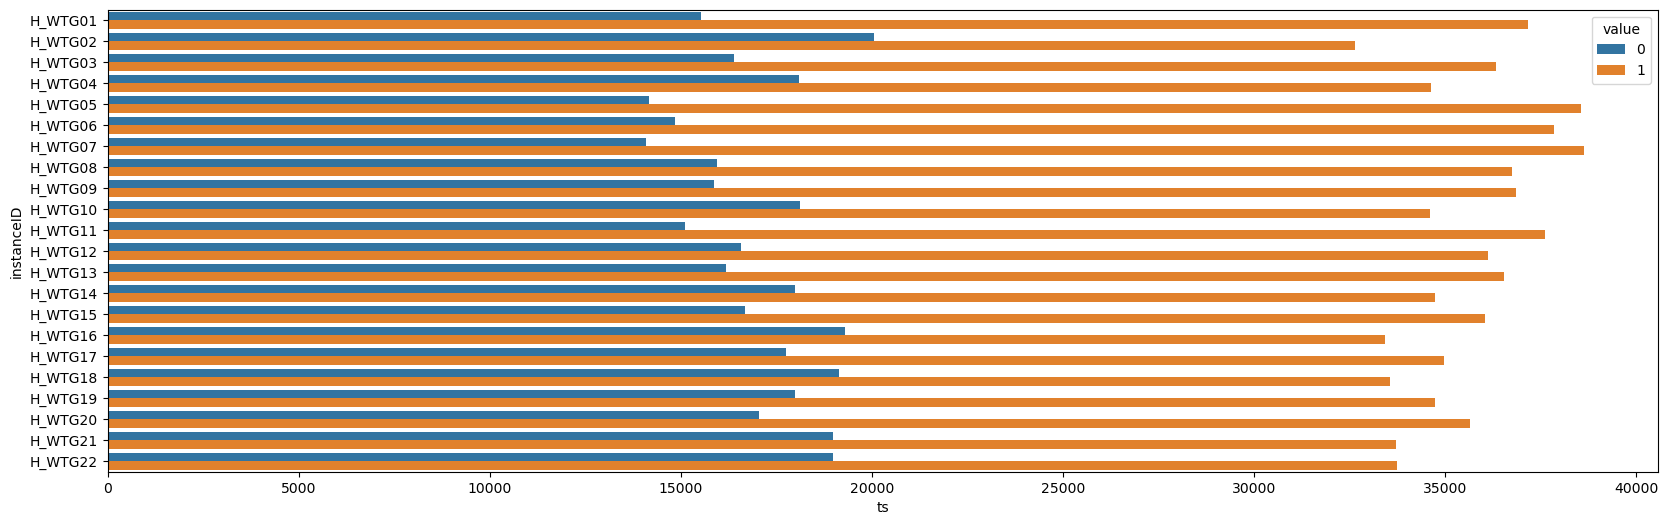

In [17]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (20,6))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")

plt.show()

In [18]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [19]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,784705.000000,784705.000000,784705.000000,784705.000000,783490.000000,7.834650e+05,783421.000000,784705.000000
mean,6.435255,15.907057,11.688677,9.124334,1.502828,inf,16.440086,214.916805
std,3.587065,8.825768,6.802158,4.212893,0.595530,NaN,5.165943,162.058599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.452941
25%,3.000000,8.000000,6.000000,5.700000,1.050000,1.415385e+01,13.000000,62.000000
50%,6.000000,16.000000,12.000000,8.200000,1.410000,1.671233e+01,16.000000,183.800003
75%,10.000000,23.000000,17.000000,11.800000,1.840000,2.000000e+01,20.000000,369.000000
max,12.000000,31.000000,23.000000,29.600000,7.160000,inf,96.000000,533.000000


In [20]:
# Remove rows with wind speed = 0
data_clean = data_clean[data_clean['Wind_speed'] > 0]

In [21]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,784654.000000,784654.000000,784654.000000,784654.000000,783439.000000,783439.000000,783370.000000,784654.000000
mean,6.435360,15.906431,11.688890,9.124927,1.502848,17.597438,16.440593,214.927342
std,3.587106,8.825512,6.802113,4.212388,0.595391,5.875481,5.165697,162.057744
min,1.000000,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.452941
25%,3.000000,8.000000,6.000000,5.700000,1.050000,14.153846,13.000000,62.000000
50%,6.000000,16.000000,12.000000,8.200000,1.410000,16.712329,16.000000,183.899994
75%,10.000000,23.000000,17.000000,11.800000,1.840000,20.000001,20.000000,369.000000
max,12.000000,31.000000,23.000000,29.600000,6.400000,1414.999941,96.000000,533.000000


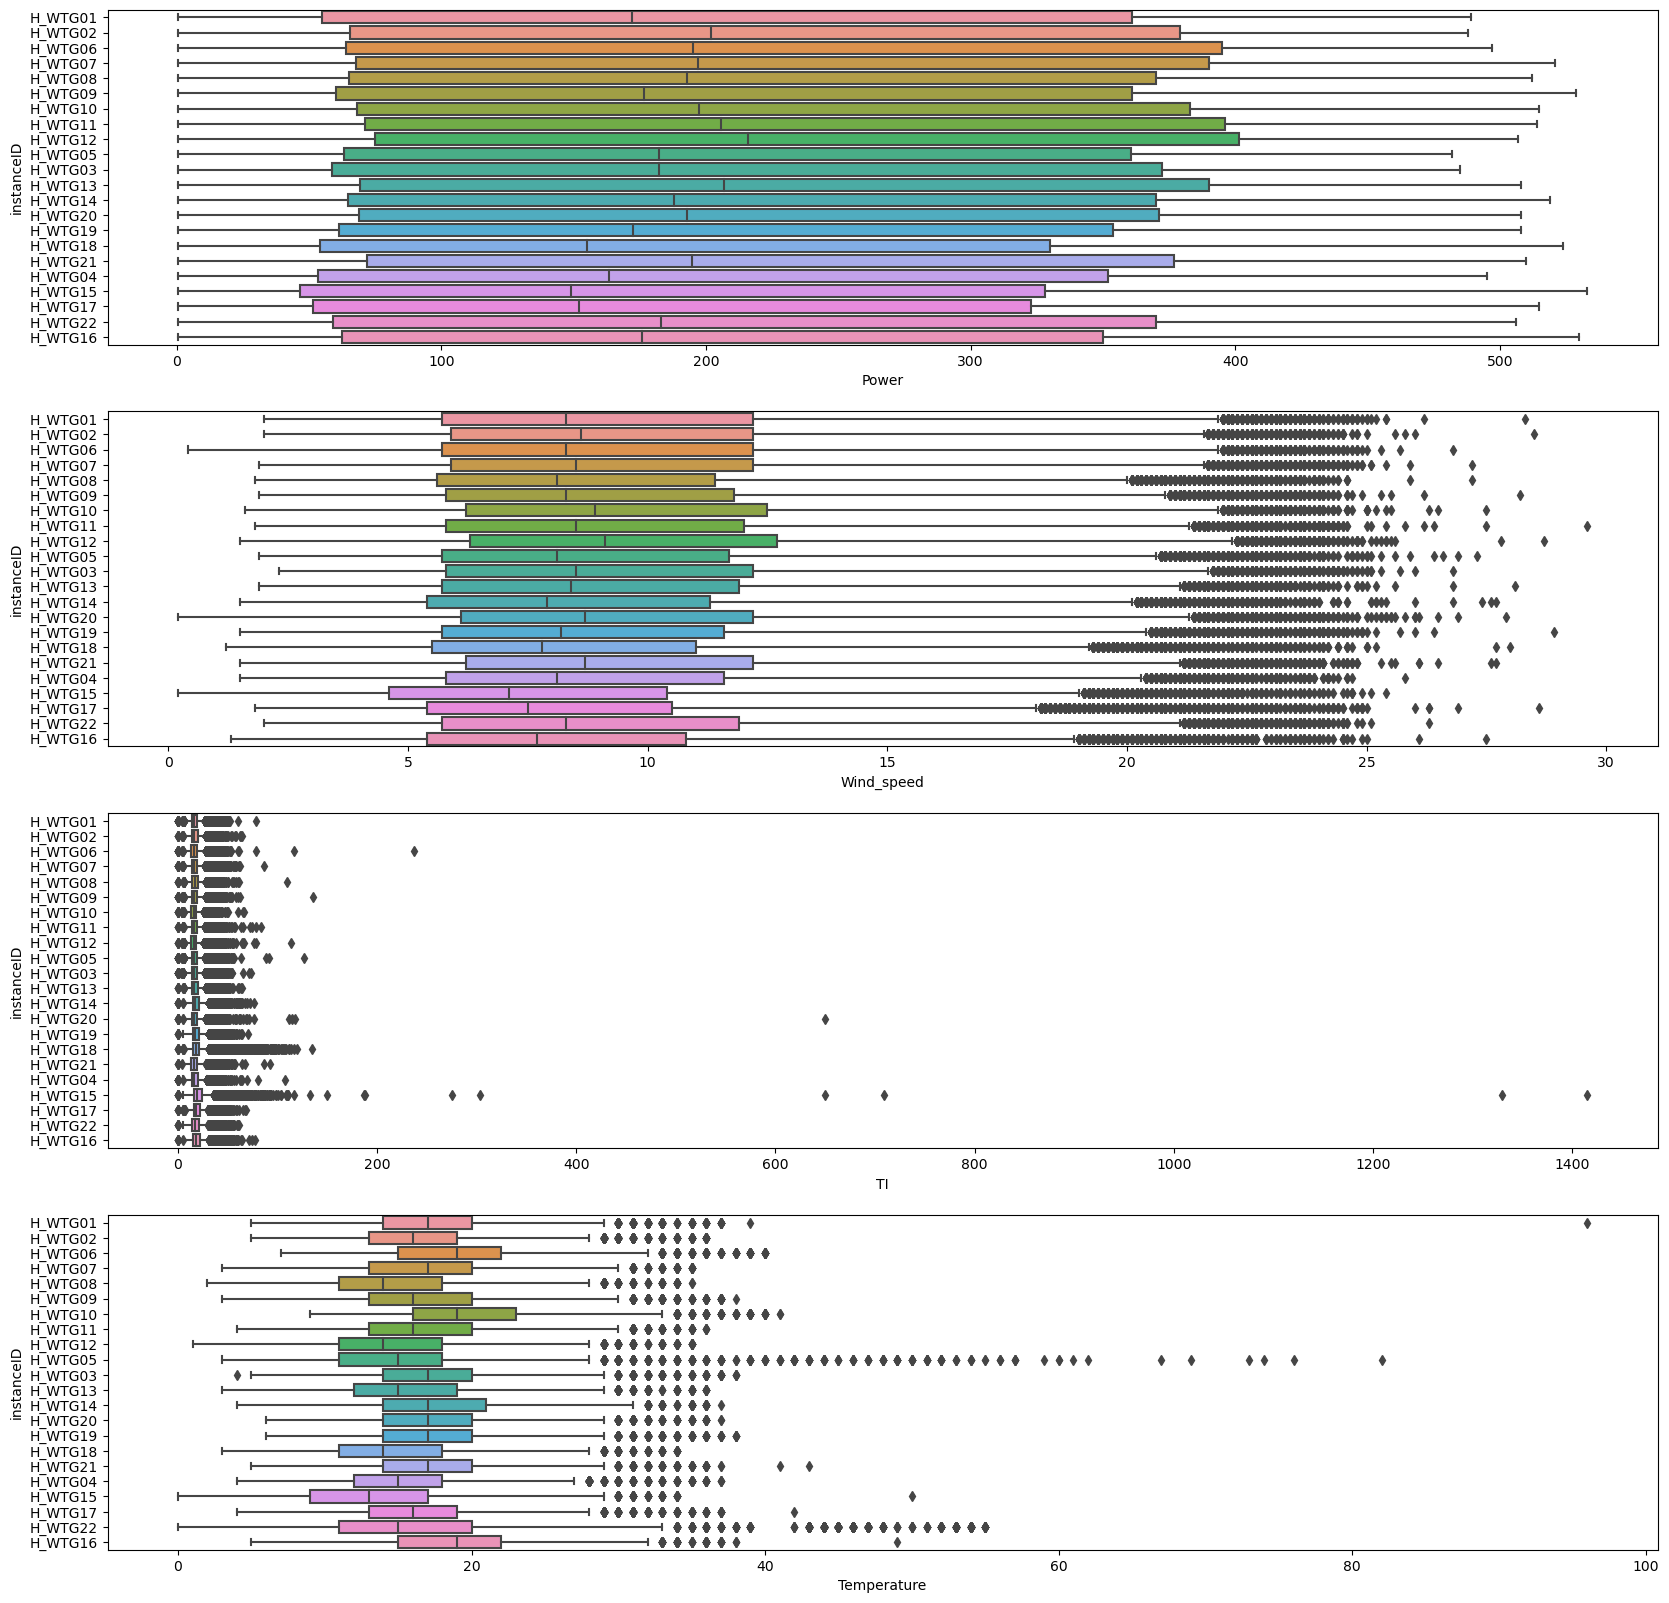

In [22]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (20,20))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

**Comment:** Extreme TI, temperature and air density values 

In [23]:
extreme_temperature = data_clean[(data_clean['Temperature'] > 40)]
extreme_temperature

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
4690,2020-01-02 11:30:00,1,2,11,H_WTG05,16.400000,2.49,15.182927,42.0,467.000000
16856,2020-01-06 07:40:00,1,6,7,H_WTG05,15.400000,2.35,15.259740,44.0,468.000000
16878,2020-01-06 07:50:00,1,6,7,H_WTG05,17.100000,2.66,15.555556,44.0,468.000000
16922,2020-01-06 08:10:00,1,6,8,H_WTG05,19.799999,2.24,11.313132,54.0,446.000000
16944,2020-01-06 08:20:00,1,6,8,H_WTG05,19.299999,2.26,11.709845,51.0,449.000000
...,...,...,...,...,...,...,...,...,...,...
795013,2020-09-07 22:40:00,9,7,22,H_WTG22,4.700000,1.14,24.255320,47.0,48.500000
795035,2020-09-07 22:50:00,9,7,22,H_WTG22,6.800000,1.10,16.176470,47.0,52.700001
795057,2020-09-07 23:00:00,9,7,23,H_WTG22,4.400000,0.77,17.499999,47.0,42.099998
795079,2020-09-07 23:10:00,9,7,23,H_WTG22,4.000000,0.89,22.250000,47.0,28.200001


In [24]:
extreme_temperature['instanceID'].value_counts()

H_WTG22    689
H_WTG05    140
H_WTG21      2
H_WTG10      2
H_WTG16      1
H_WTG15      1
H_WTG17      1
H_WTG01      1
Name: instanceID, dtype: int64

In [25]:
data_clean[data_clean['TI'] > 100]

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
56909,2020-01-18 23:00:00,1,18,23,H_WTG18,1.6,1.73,108.125000,7.0,5.000000
56953,2020-01-18 23:20:00,1,18,23,H_WTG18,1.5,1.58,105.333336,7.0,8.000000
61705,2020-01-20 11:20:00,1,20,11,H_WTG18,1.2,1.61,134.166663,7.0,2.000000
61771,2020-01-20 11:50:00,1,20,11,H_WTG18,1.3,1.52,116.923080,7.0,7.000000
61793,2020-01-20 12:00:00,1,20,12,H_WTG18,1.4,1.67,119.285713,8.0,21.000000
61815,2020-01-20 12:10:00,1,20,12,H_WTG18,1.7,1.90,111.764701,8.0,19.000000
61859,2020-01-20 12:30:00,1,20,12,H_WTG18,2.2,2.35,106.818175,8.0,43.000000
62387,2020-01-20 16:30:00,1,20,16,H_WTG18,1.7,1.82,107.058824,9.0,13.000000
110149,2020-02-04 18:20:00,2,4,18,H_WTG18,1.6,1.67,104.374996,11.0,11.000000
110435,2020-02-04 20:30:00,2,4,20,H_WTG18,1.7,1.73,101.764704,11.0,11.000000


In [26]:
# drop rows with extreme values
data_clean = data_clean[(data_clean['Temperature'] <= 40)]
data_clean = data_clean[(data_clean['Temperature'] >= -5)]
data_clean = data_clean[(data_clean['TI'] <= 100)]

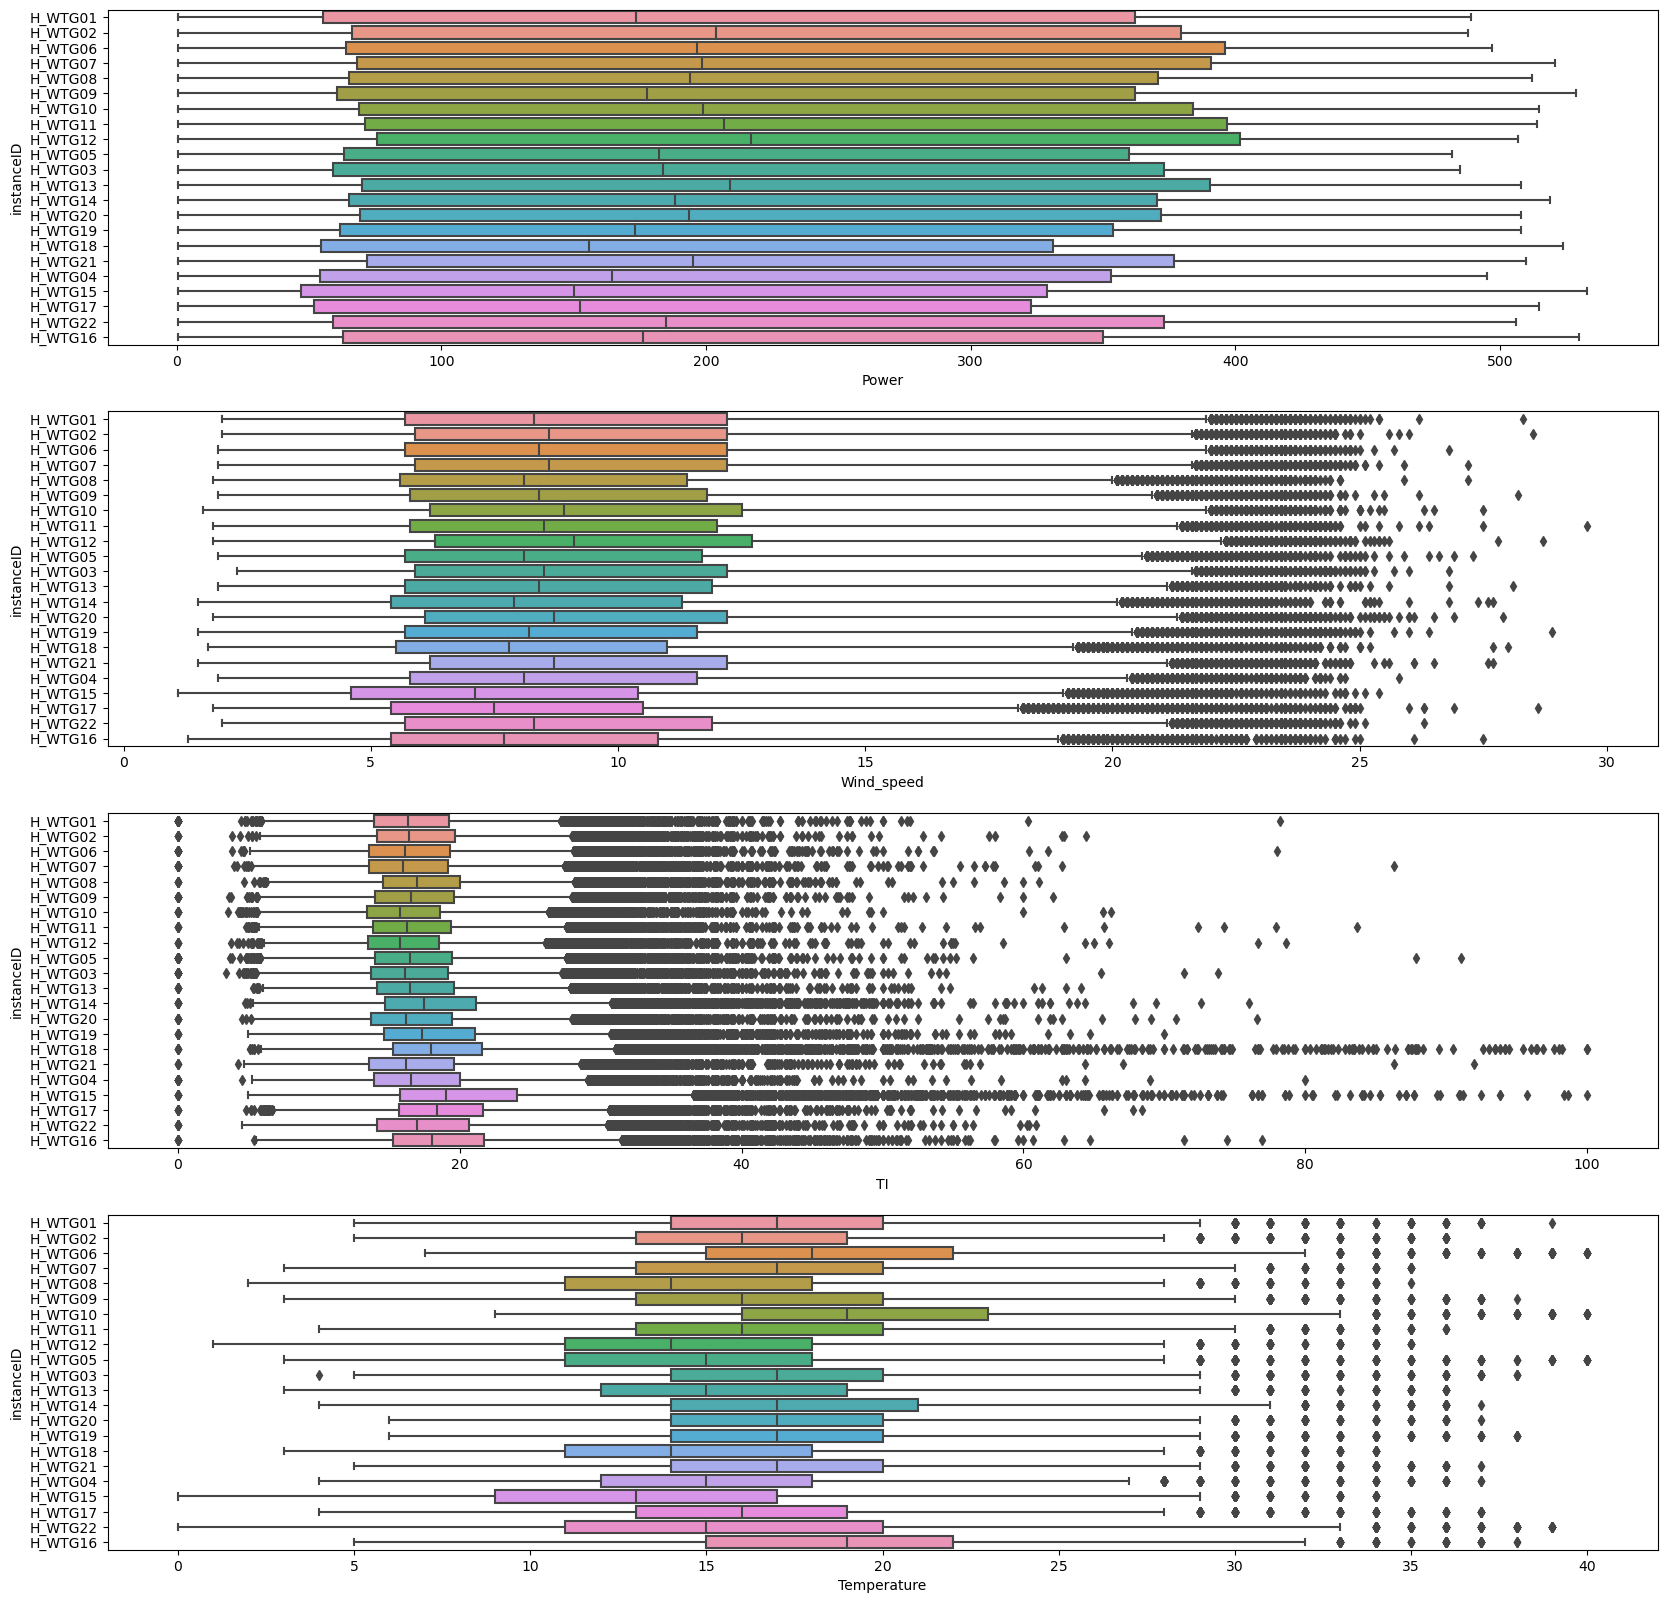

In [27]:
# boxplot after removing extreme values
fig, ax = plt.subplots(4, figsize = (20,20))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

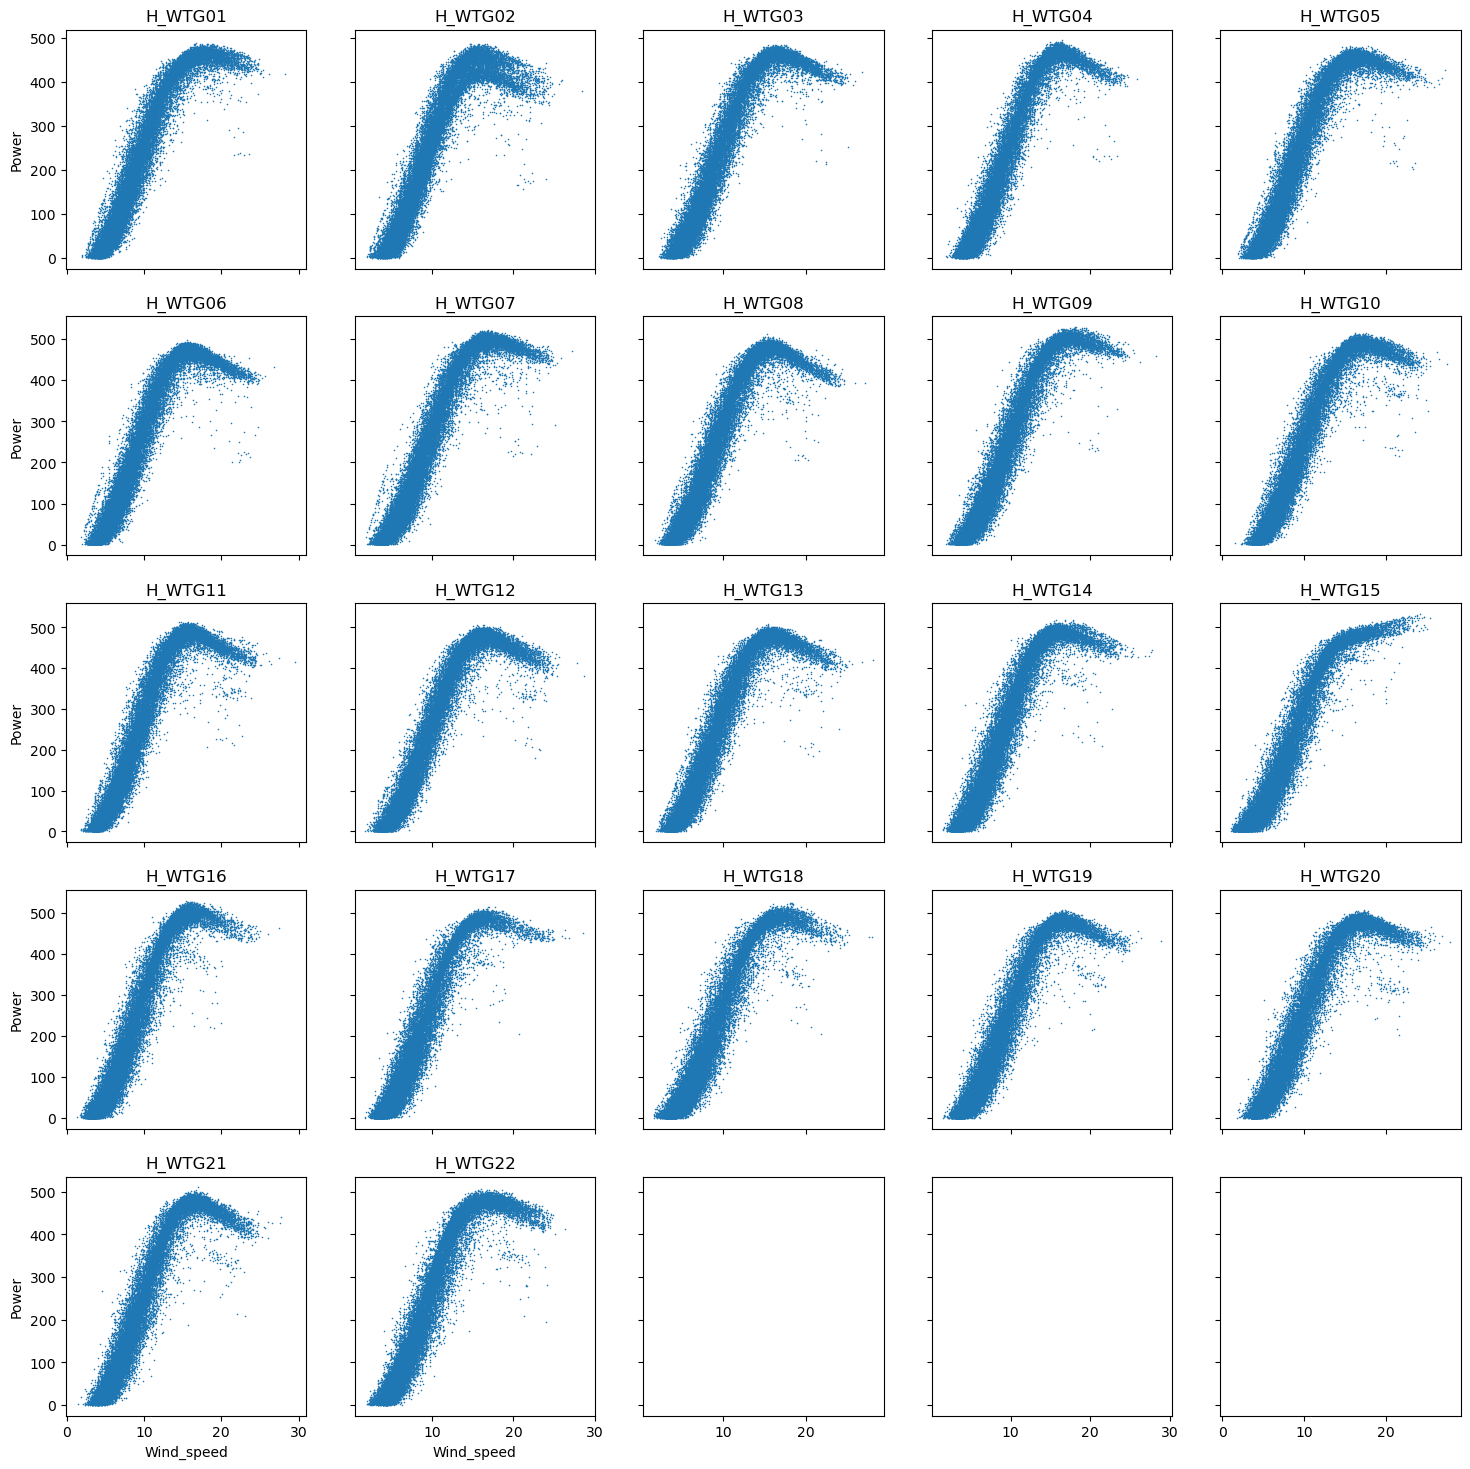

In [28]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (5):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

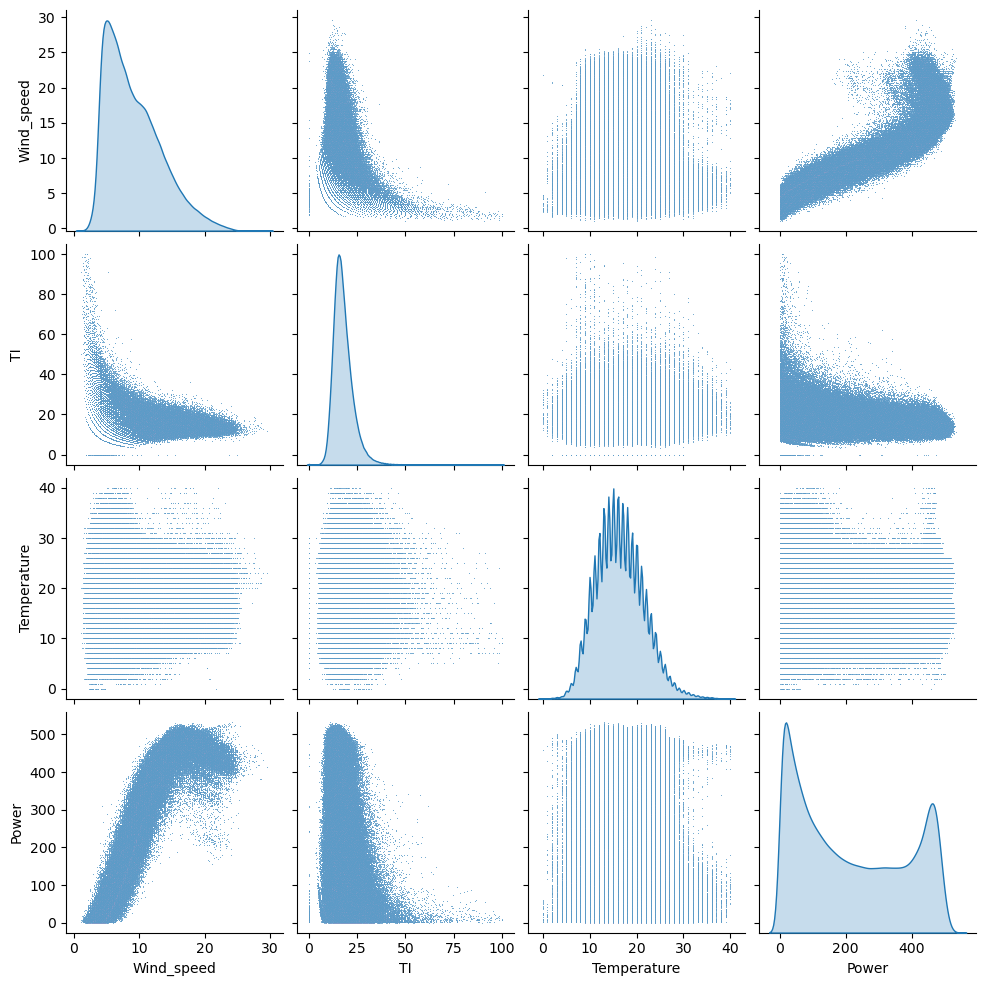

In [29]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

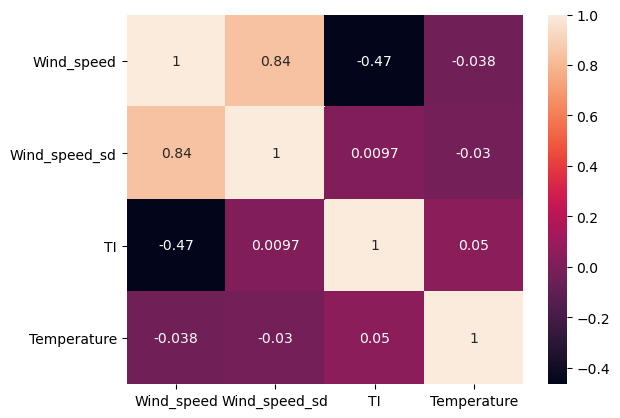

In [30]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

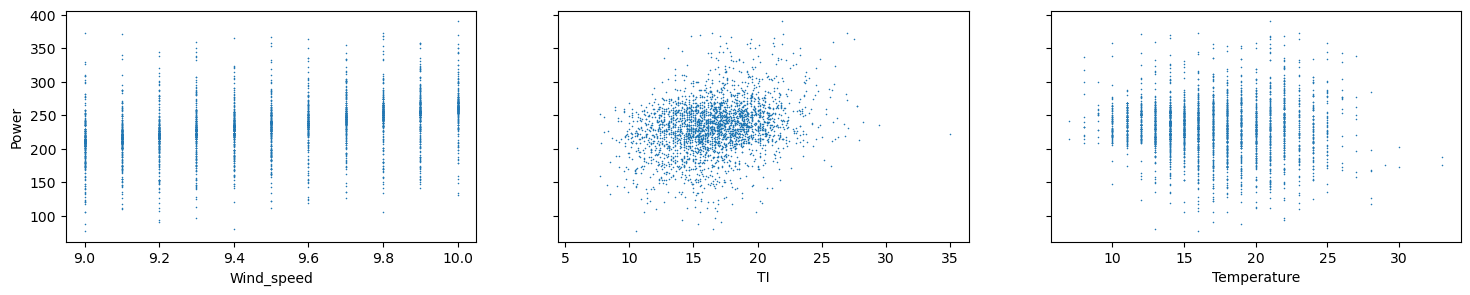

In [31]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

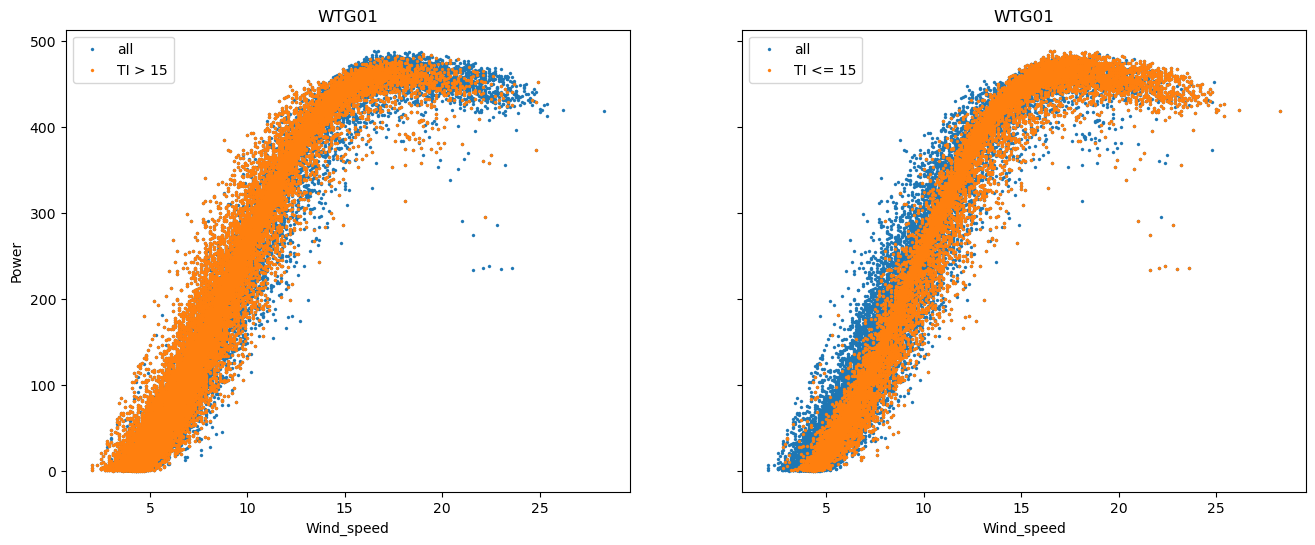

In [34]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] > 15)] 
WTG01_b = WTG01[(WTG01['TI'] <= 15)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI > 15', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 15', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTG01") 

plt.show()

### Export clean data

In [35]:
data_clean.to_csv("")